### ECSE 415 Assignment 1
### Michael Rafferty
### 261008877

## 1 Image Acquisition (5 Points)

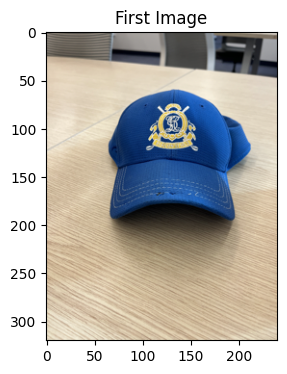

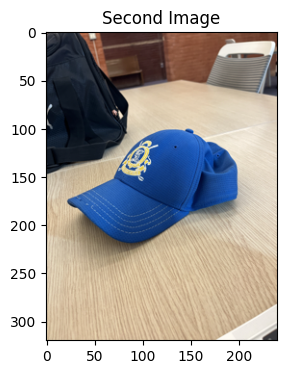

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Insert path to image
path1 = '/Users/mike/Documents/ECSE_415/A1/'
path2 = '/Users/mike/Documents/ECSE_415/A1/'

# Load in the images
image1 = cv2.cvtColor(cv2.imread(path1 + '1stImage.png'), cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(cv2.imread(path2 + '2ndImage.png'), cv2.COLOR_BGR2RGB)

# Plotting images
plt.figure(figsize=(3,4))
plt.title("First Image")
plt.imshow(image1, cmap = 'gray')
plt.figure(figsize=(3,4))
plt.title("Second Image")
plt.imshow(image2)



### 2 Convert to Grayscale (5 Points)
### If your images are color (RGB), convert them to Grayscale, by averaging each pixel’s R, G, and B values. Display the grayscale images in the assignment’s Jupyter notebook.

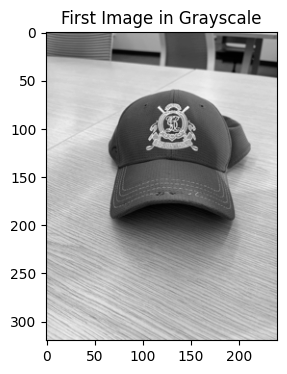

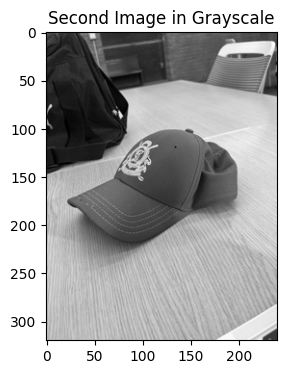

In [2]:
# Converting to grayscale
gray1 = np.mean(image1, axis=2)
gray2 = np.mean(image2, axis=2)

#plotting
plt.figure(figsize=(3,4))
plt.title("First Image in Grayscale")
plt.imshow((gray1), cmap='gray')

plt.figure(figsize=(3,4))
plt.title("Second Image in Grayscale")
plt.imshow((gray2), cmap='gray')


### 3 Smooth the images using Gaussian smoothing (10 Points)
### Smooth the pair of grayscale images using a 5x5 pixel Gaussian kernel. Then repeat the smoothing on the original grayscale images, this time using a 11x11 Gaussian kernel. Display the smoothed images in the notebook.

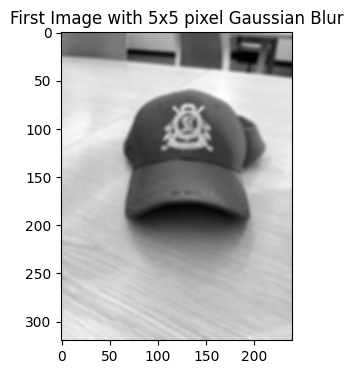

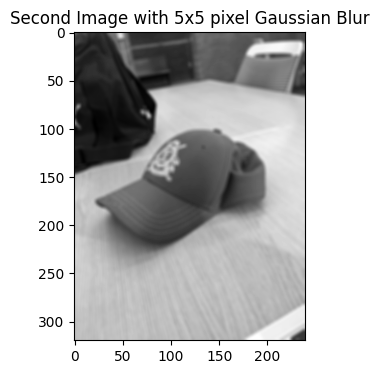

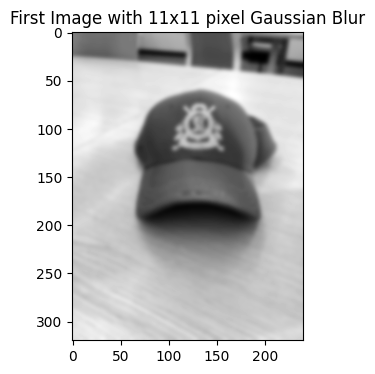

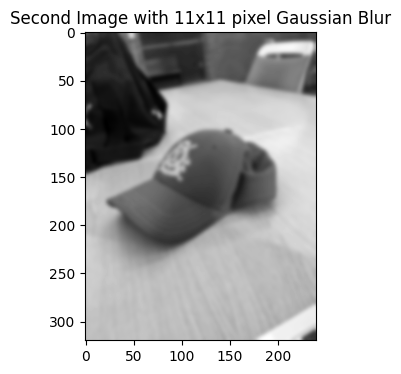

In [3]:
# Creating custom kernels

# 5x5 kernel
kern1_5x5 = cv2.GaussianBlur(gray1, (5,5), 2)
kern2_5x5 = cv2.GaussianBlur(gray2, (5,5), 2)

# 11x11 kernel
kern1_11x11 = cv2.GaussianBlur(gray1, (11,11), 2)
kern2_11x11 = cv2.GaussianBlur(gray2, (11,11), 2)

#plotting
plt.figure(figsize=(3,4))
plt.title("First Image with 5x5 pixel Gaussian Blur")
plt.imshow(kern1_5x5, cmap='gray')
plt.figure(figsize=(3,4))
plt.title("Second Image with 5x5 pixel Gaussian Blur")
plt.imshow(kern2_5x5, cmap='gray')

plt.figure(figsize=(3,4))
plt.title("First Image with 11x11 pixel Gaussian Blur")
plt.imshow(kern1_11x11, cmap='gray')
plt.figure(figsize=(3,4))
plt.title("Second Image with 11x11 pixel Gaussian Blur")
plt.imshow(kern2_11x11, cmap='gray')



### 4 Compute Image Gradients (10 Points)
### Compute the x and y derivative images of the smoothed images using the horizontal and vertical Sobel filters. Display the derivative images in the notebook.

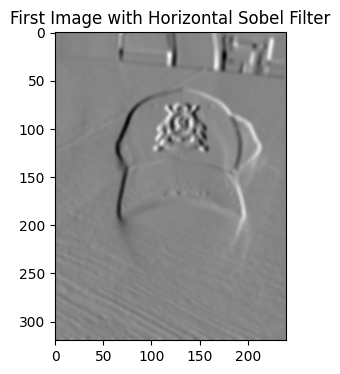

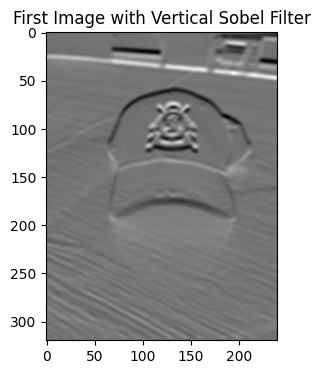

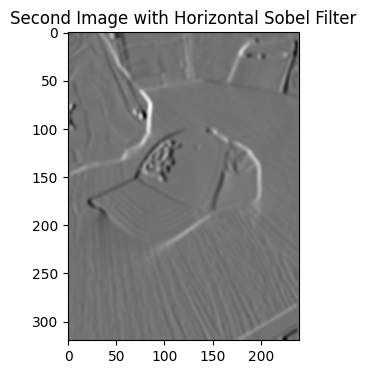

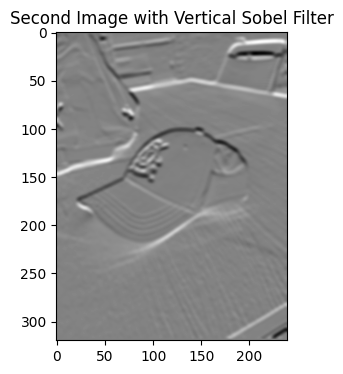

In [4]:
# Computing x and y derivatives of the smoothed images
dx1 = cv2.Sobel(kern1_5x5, cv2.CV_16S, 1,0, ksize=5) 
dy1 = cv2.Sobel(kern1_5x5, cv2.CV_16S, 0,1, ksize=5)

dx2 = cv2.Sobel(kern2_5x5, cv2.CV_16S, 1,0, ksize=5) 
dy2 = cv2.Sobel(kern2_5x5, cv2.CV_16S, 0,1, ksize=5)

# Plotting
plt.figure(figsize=(3,4))
plt.title("First Image with Horizontal Sobel Filter")
plt.imshow(dx1, cmap='gray')
plt.figure(figsize=(3,4))
plt.title("First Image with Vertical Sobel Filter")
plt.imshow(dy1, cmap='gray')

plt.figure(figsize=(3,4))
plt.title("Second Image with Horizontal Sobel Filter")
plt.imshow(dx2, cmap='gray')
plt.figure(figsize=(3,4))
plt.title("Second Image with Vertical Sobel Filter")
plt.imshow(dy2, cmap='gray')


### 5 Compute the Edge Magnitude and Orientation (10 Points)
### Compute the edge gradient magnitude and orientation of the smoothed images using the Sobel filter values. Display the magnitude and orientation images in the notebook. For the orientation image, display the angle value using an RGB colormap, such as ‘jet’ in the imshow() function (e.g. something like ax.imshow(data, cmap='jet') ). Details about matplotlib colormaps, including other colormaps you can try, can be found at:
### https://matplotlib.org/stable/tutorials/colors/colormaps.html

/var/folders/0t/gp_ld_w57bg7wljg0fzwpqlh0000gn/T/ipykernel_7235/3935584641.py:2: RuntimeWarning: invalid value encountered in sqrt
  magnitude1 = np.sqrt(dx1*dx1 + dy1*dy1)
/var/folders/0t/gp_ld_w57bg7wljg0fzwpqlh0000gn/T/ipykernel_7235/3935584641.py:5: RuntimeWarning: invalid value encountered in sqrt
  magnitude2 = np.sqrt((dx2**2) + (dy2**2))


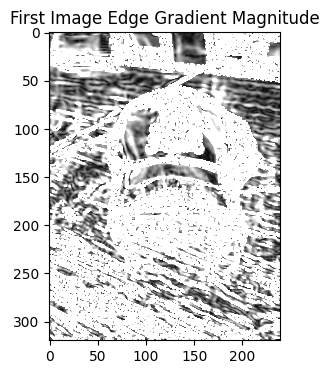

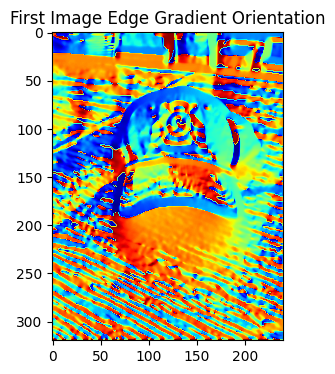

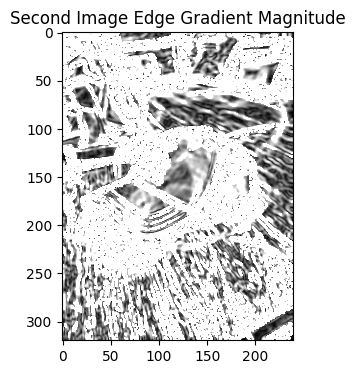

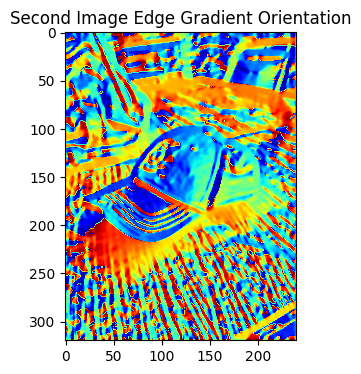

In [5]:
# Computing edge gradient magnitude and edge gradient orientation of the smoothed images
magnitude1 = np.sqrt(dx1*dx1 + dy1*dy1)
orientation1 = np.arctan2(dy1,dx1) 

magnitude2 = np.sqrt((dx2**2) + (dy2**2))
orientation2 = np.arctan2(dy2,dx2) 

# print("Min value of dx1:", np.min(np.abs(dx1)))
# print("Max value of dx1:", np.max(dx1))
# print("Min value of dy1:", np.min(dy1))
# print("Max value of dy1:", np.max(dy1))

# Plotting
plt.figure(figsize=(3,4))
plt.title("First Image Edge Gradient Magnitude")
plt.imshow(magnitude1, cmap='gray')
plt.figure(figsize=(3,4))
plt.title("First Image Edge Gradient Orientation")
plt.imshow(orientation1, cmap='jet')

plt.figure(figsize=(3,4))
plt.title("Second Image Edge Gradient Magnitude")
plt.imshow(magnitude2, cmap='gray')
plt.figure(figsize=(3,4))
plt.title("Second Image Edge Gradient Orientation")
plt.imshow(orientation2, cmap='jet')


### 6 Canny Edge Detection with opencv (10 Points)
### Setup opencv in your colab or home computer environment (go to the Tutorial to learn how to do this). Use the Canny edge detector implementation in opencv to compute the Canny edge detector on your smoothed images. (look at https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html for details).
### Plot the Canny detector output images in the notebook.

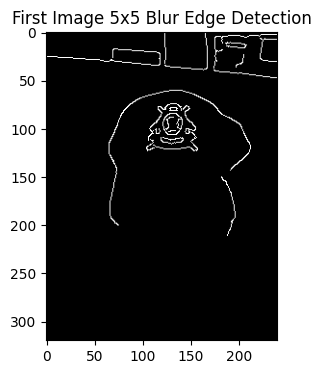

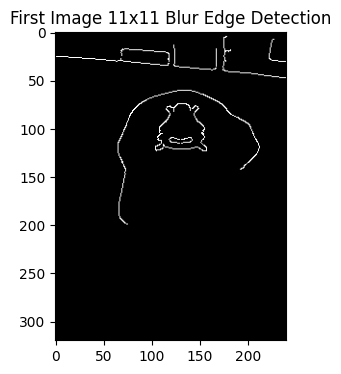

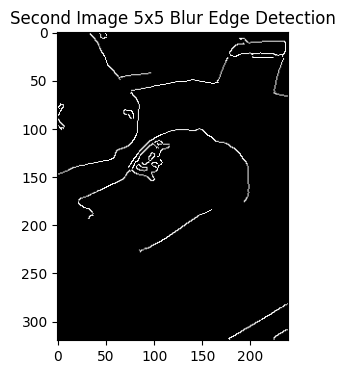

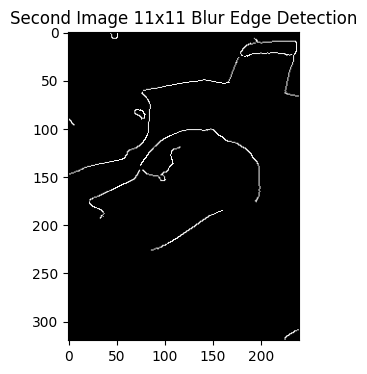

In [6]:
# Detecting edges using the .Canny() function
# first we fix the data type so that it wroks with cv2.Canny()
# then we apply cv2.Canny() edge detection
kern1_5x5 = np.array(kern1_5x5, dtype=np.uint8) 
edges1 = cv2.Canny(kern1_5x5,100,200)

kern1_11x11 = np.array(kern1_11x11, dtype=np.uint8)
edges11 = cv2.Canny(kern1_11x11,100,200)

kern2_5x5 = np.array(kern2_5x5, dtype=np.uint8)
edges2 = cv2.Canny(kern2_5x5,100,200)

kern2_11x11 = np.array(kern2_11x11, dtype=np.uint8)
edges22 = cv2.Canny(kern2_11x11,100,200)

plt.figure(figsize=(3,4))
plt.title("First Image 5x5 Blur Edge Detection")
plt.imshow(edges1, cmap='gray')
plt.figure(figsize=(3,4))
plt.title("First Image 11x11 Blur Edge Detection")
plt.imshow(edges11, cmap='gray')

plt.figure(figsize=(3,4))
plt.title("Second Image 5x5 Blur Edge Detection")
plt.imshow(edges2, cmap='gray')
plt.figure(figsize=(3,4))
plt.title("Second Image 11x11 Blur Edge Detection")
plt.imshow(edges22, cmap='gray')
